In [16]:
# modules we'll use
import pandas as pd
from textwrap import wrap
import matplotlib.pyplot as plt

In [17]:
# read in all our data
spotify_results = pd.read_csv("../results/genetic_algorithm_stats_2022-01-23_23-54-37.csv")

In [18]:
# look at a few rows of the results file
spotify_results.sample(5)

,Generation number,Best fitness,Best genome,Worst fitness,Worst genome,Mean,Average,Standard deviation
90,90,97.224800,"Genome{fitness:97.22480010986328,genes:[Intege...",98.011894,"Genome{fitness:98.01189422607422,genes:[Intege...",97.490021,97.490021,0.227415
10,10,98.010201,"Genome{fitness:98.01020050048828,genes:[Intege...",99.189919,"Genome{fitness:99.1899185180664,genes:[Integer...",98.512611,98.512611,0.289400
3,3,98.588692,"Genome{fitness:98.58869171142578,genes:[Intege...",100.355309,"Genome{fitness:100.35530853271484,genes:[Integ...",99.301363,99.301363,0.496275
112,112,97.017776,"Genome{fitness:97.01777648925781,genes:[Intege...",99.620880,"Genome{fitness:99.62088012695312,genes:[Intege...",97.871821,97.871821,0.869673
36,36,97.477867,"Genome{fitness:97.47786712646484,genes:[Intege...",98.981194,"Genome{fitness:98.98119354248047,genes:[Intege...",97.749286,97.749286,0.339700


In [19]:
# get info about DataFrame columns
spotify_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Generation number   121 non-null    int64  
 1   Best fitness        121 non-null    float64
 2   Best genome         121 non-null    object 
 3   Worst fitness       121 non-null    float64
 4   Worst genome        121 non-null    object 
 5   Mean                121 non-null    float64
 6   Average             121 non-null    float64
 7   Standard deviation  121 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 7.7+ KB


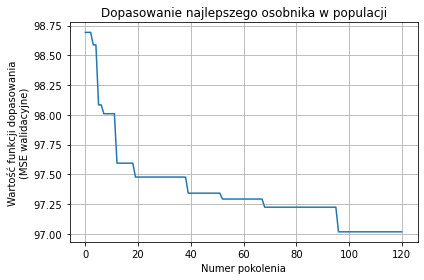

In [20]:
ax = spotify_results.plot(x='Generation number', y='Best fitness', title='Dopasowanie najlepszego osobnika w populacji',
                          grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_fitness.eps')

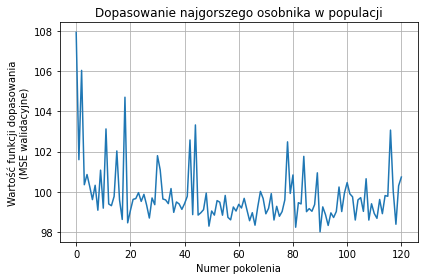

In [21]:
ax = spotify_results.plot(x='Generation number', y='Worst fitness',
                          title='Dopasowanie najgorszego osobnika w populacji', grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_worst_fitness.eps')

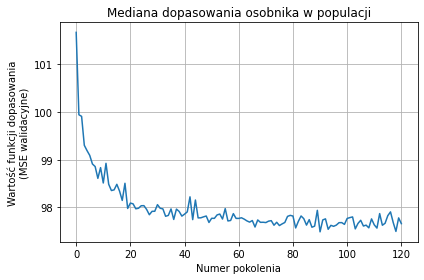

In [22]:
ax = spotify_results.plot(x='Generation number', y='Mean',
                          title='Mediana dopasowania osobnika w populacji', grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_mean_fitness.eps')

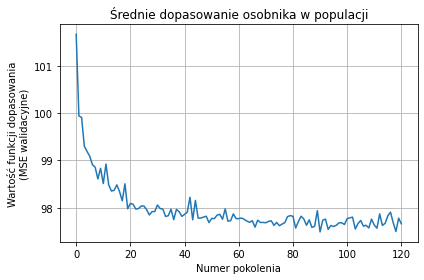

In [23]:
ax = spotify_results.plot(x='Generation number', y='Average',
                          title='Średnie dopasowanie osobnika w populacji', grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_average_fitness.eps')

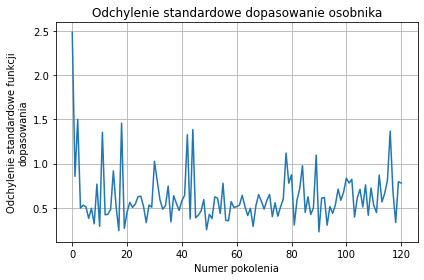

In [24]:
ax = spotify_results.plot(x='Generation number', y='Standard deviation',
                          title='Odchylenie standardowe dopasowanie osobnika', grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Odchylenie standardowe funkcji dopasowania', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_fitness_standard_deviation.eps')

In [25]:
# read in all our data
final_model_results = pd.read_csv("../results/spotify_final_he_elu_adam_181_112_55_2022-01-24_21-45-22.csv", sep=";")

In [26]:
# look at a few rows of the results file
final_model_results.sample(5)

,epoch,loss,mean_absolute_error,mean_squared_error,rmse,val_loss,val_mean_absolute_error,val_mean_squared_error,val_rmse
27,27,100.606438,7.199242,100.606438,10.030276,97.448494,7.027122,97.448494,9.871600
52,52,98.369141,7.132627,98.369141,9.918121,97.428879,7.131304,97.428879,9.870606
5,5,105.995842,7.422018,105.995842,10.295428,100.772820,7.126558,100.772820,10.038567
46,46,98.468071,7.133296,98.468071,9.923108,97.050720,7.032681,97.050720,9.851432
16,16,102.268509,7.261298,102.268509,10.112789,98.985825,7.242437,98.985825,9.949162


In [27]:
# get info about DataFrame columns
final_model_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   epoch                    61 non-null     int64  
 1   loss                     61 non-null     float64
 2   mean_absolute_error      61 non-null     float64
 3   mean_squared_error       61 non-null     float64
 4   rmse                     61 non-null     float64
 5   val_loss                 61 non-null     float64
 6   val_mean_absolute_error  61 non-null     float64
 7   val_mean_squared_error   61 non-null     float64
 8   val_rmse                 61 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.4 KB


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


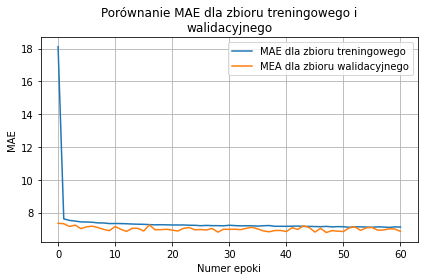

In [28]:
ax = final_model_results.plot(x='epoch', y=['mean_absolute_error', 'val_mean_absolute_error'],
                              title='\n'.join(wrap('Porównanie MAE dla zbioru treningowego i walidacyjnego', 40)),
                              grid='True')
ax.set_xlabel('Numer epoki')
ax.set_ylabel('MAE')
ax.legend(['MAE dla zbioru treningowego', 'MEA dla zbioru walidacyjnego'])
plt.tight_layout()
plt.savefig('plots\\f_m_mae_train_valid.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


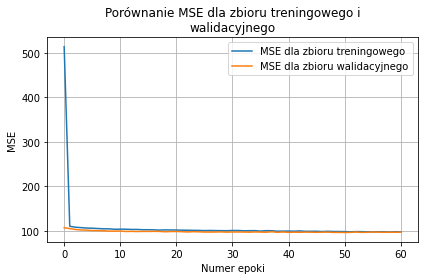

In [29]:
ax = final_model_results.plot(x='epoch', y=['mean_squared_error', 'val_mean_squared_error'],
                              title='\n'.join(wrap('Porównanie MSE dla zbioru treningowego i walidacyjnego', 40)),
                              grid='True')
ax.set_xlabel('Numer epoki')
ax.set_ylabel('MSE')
ax.legend(['MSE dla zbioru treningowego', 'MSE dla zbioru walidacyjnego'])
plt.tight_layout()
plt.savefig('plots\\f_m_mse_train_valid.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


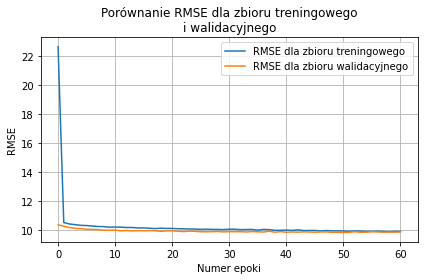

In [30]:
ax = final_model_results.plot(x='epoch', y=['rmse', 'val_rmse'],
                              title='\n'.join(wrap('Porównanie RMSE dla zbioru treningowego i walidacyjnego', 40)),
                              grid='True')
ax.set_xlabel('Numer epoki')
ax.set_ylabel('RMSE')
ax.legend(['RMSE dla zbioru treningowego', 'RMSE dla zbioru walidacyjnego'])
plt.tight_layout()
plt.savefig('plots\\f_m_rmse_train_valid.eps')